# Principal Components Analysis (PCA) on two fully correlated variables with noise.

*Costas Andreopoulos \<c.andreopoulos@cern.ch\>*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Generate synthetic 2D dataset and standardize it (run Z-score normalization)

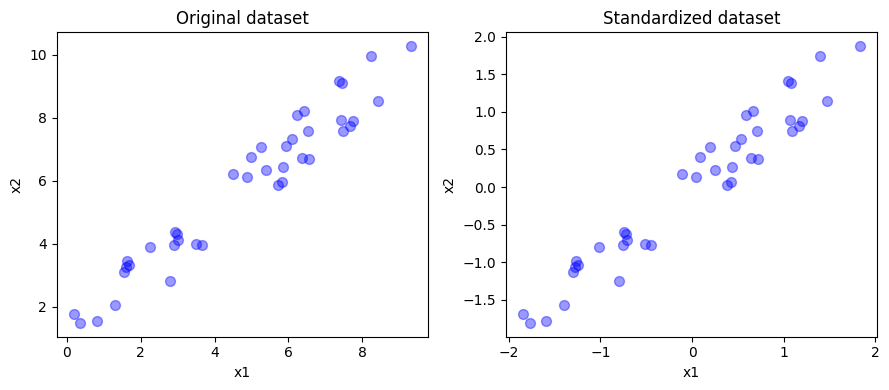

In [2]:
seed          =  80 # random number seed for reproducibility
n_samples     =  40 # number of samples
x_scale       =  10 # maximum value for features x1 (and x2, except for noise)
x_noise_scale =   2 # maximum value of noise on x2

rng = np.random.default_rng(seed=seed) # random number generator

# Build a dataset (with size = n_samples) of 2-dimensional feature vectors (x1,x2).
# The features x1 and x2 will be perfectly correlated (x1=x2) but a small noise will be added on x2.
x1 = x_scale * rng.random(n_samples)
x2 = x1 + x_noise_scale * np.random.random(n_samples)  # Add noise so that x1,x2 are not *perfectly* correlated
X  = np.column_stack((x1, x2)) # Stack as 2D dataset

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

# Plot the data
fig = plt.figure(figsize=(9,4))
gs = gridspec.GridSpec(1,2,width_ratios=[1,1])
axL = fig.add_subplot(gs[0,0])
axL.scatter(X[:, 0], X[:, 1], color='blue', s=50, alpha=0.4)
axL.set_title('Original dataset')
axL.set_xlabel("x1")
axL.set_ylabel("x2")
axR = fig.add_subplot(gs[0,1])
axR.scatter(X_scaled[:, 0], X_scaled[:, 1], color='blue', s=50, alpha=0.4)
axR.set_title('Standardized dataset')
axR.set_xlabel("x1")
axR.set_ylabel("x2")
plt.tight_layout()
plt.show()

Run PCA with 2 components and overlay the PCA axes (as arrows, with length equal to the corresponding PCA eigenvalue descibing the variance along this axis) on a plot of the standardized features of the input dataset. The main principal component capturing most of the variance should be along the x2=x1 line.

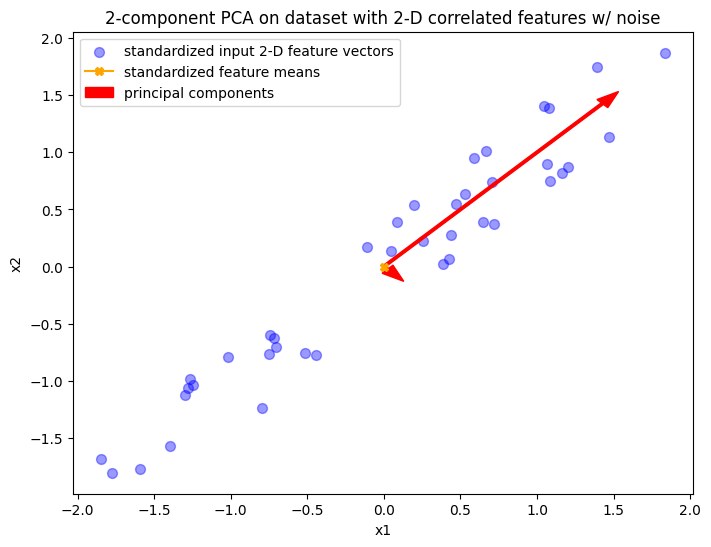

In [3]:
# Run PCA with 2 components
pca = PCA(n_components=2) 
pca.fit(X_scaled)

# Get the means of input standardized features
x_mean = pca.mean_ 
# Get an array with the eigenvalue of each principal component
pc_eigenvalues = pca.explained_variance_
# Get an array with the unit vectors describing each principal component in the original data space
pc_unit_vectors = pca.components_

# Plot
fig = plt.figure(figsize=(8,6)) 
# Plot the input 2-dimensional data and their mean (as a point)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], 
            marker='o', color='blue', s=50, alpha=0.4, label="standardized input 2-D feature vectors")
plt.plot(x_mean[0], x_mean[1], 
         marker='X', color='orange', label="standardized feature means")
# Plot the 2 principal components as vectors starting from the point of feature means 
# and with a length equal to the corresponding PCA eigenvalue.
for eigenvalue, unit_vector in zip(pc_eigenvalues, pc_unit_vectors):
    v = unit_vector * eigenvalue
    plt.arrow(x_mean[0], x_mean[1], v[0], v[1], 
              color='red', width=0.02, head_width=0.1, 
              label='principal components' if 'principal components' not in plt.gca().get_legend_handles_labels()[1] else "")    
plt.title('2-component PCA on dataset with 2-D correlated features w/ noise')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

Now, run the PCA with just one component, and plot: a) the input 2-D dataset, b) the principal axis, c) and the 1-D reduced dataset (along the principal axis) and d) the reconstructed 2-D dataset obtained by running the inverse PCA transform on the reduced 1-dimensional data. Obviously, (c) and (d) will. yield the same points.

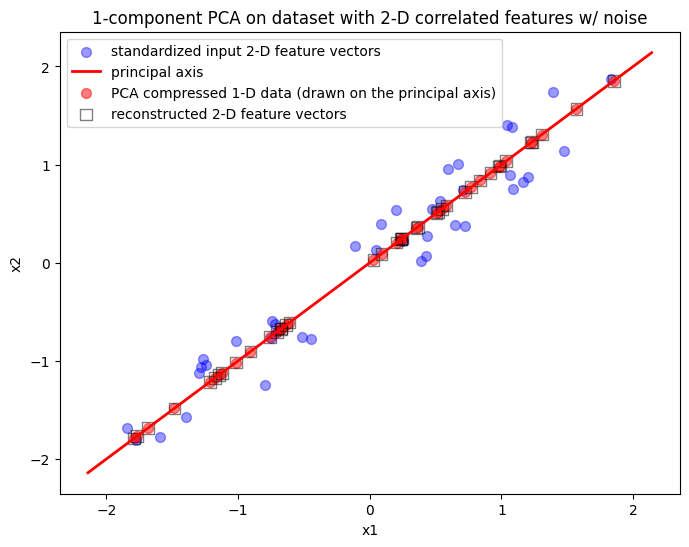

In [4]:
# Run PCA with 1 component
pca = PCA(n_components=1)
pca.fit(X_scaled)

# Get the eigenvalue for the single principal component
pc_eigenvalue  = pca.explained_variance_[0]
# Get a unit vectors describing the single principal component in the original data space
pc_unit_vector = pca.components_[0]

# Compress input data and get a lower-dimensionality code
X_reduced = pca.transform(X_scaled)
# Decompress the lower-dimensionality code, and map it back to the original data space
X_reconstructed = pca.inverse_transform(X_reduced)  

# Plot
fig = plt.figure(figsize=(8,6)) 
# Plot the original 2-dimensional data
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], 
            marker='o', color='blue', s=50, alpha=0.4, label="standardized input 2-D feature vectors")
# Draw a line along the principal component axis
start = - 1.5 * pc_eigenvalue * pc_unit_vector  
end   = + 1.5 * pc_eigenvalue * pc_unit_vector  
plt.plot([start[0], end[0]], [start[1], end[1]], 
         color='red', linewidth=2, label="principal axis")
# Draw the reduced 1-dimensional data, along the principal component axis
X_reduced_on_pc = pc_unit_vector * X_reduced
plt.scatter(X_reduced_on_pc[:, 0], X_reduced_on_pc[:, 1], 
            marker='o', color='red', s=50, alpha=0.5, label="PCA compressed 1-D data (drawn on the principal axis)")
# Draw the "reconstructed" 2-dimensionional data, obtained by running the inverse transform on the reduced 1-dimensional data.
# The 2-dimensional points will line up on the principal axis, and will overlap with the points drawn above.
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], 
            marker='s', edgecolors='black', facecolors='none', s=70, alpha=0.5, label="reconstructed 2-D feature vectors")
plt.title('1-component PCA on dataset with 2-D correlated features w/ noise')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()